In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")



In [2]:
def load_data(data_dir):
    images = []
    labels = []
    class_labels = {'COVID': 0, 'non-COVID': 1}

    for class_name, class_index in class_labels.items():
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize((224, 224))  # İsteğe bağlı olarak yeniden boyutlandırma
            img = np.array(img)
            images.append(img)
            labels.append(class_index)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

data_dir = '/content/drive/MyDrive/Covid_classification/dataset'  # Veri setinizin ana dizinini buraya girin
data, labels = load_data(data_dir)


In [3]:
data.shape

(2481, 224, 224, 3)

In [4]:
labels.shape

(2481,)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [6]:
y_train.shape

(1984,)

In [7]:
y_train.shape

(1984,)

In [8]:
x_train

array([[[[ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        [[ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        [[ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68],
         ...,
         [ 68,  68,  68],
         [ 68,  68,  68],
         [ 68,  68,  68]],

        ...,

        [[194, 194, 194],
         [197, 197, 197],
         [201, 201, 201],
         ...,
         [ 62,  62,  62],
         [123, 123, 123],
         [202, 202, 202]],

        [[195, 195, 195],
         [196, 196, 196],
         [199, 199, 199],
         ...,
         [ 62,  62,  62],
         [122, 122, 122],
         [201, 201, 201]],

        [[195, 195, 195],
         [196, 196, 196],
         [195, 195, 195],
         ...,
         [ 63,  63,  63],
        

In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [10]:
x_train

array([[[[0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         ...,
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668]],

        [[0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         ...,
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668]],

        [[0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         ...,
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668],
         [0.26666668, 0.26666668, 0.26666668]],

        ...,

        [[0.7607843 , 0.7607843 , 0.7607843 ],
         [0.77254903, 0.77254903, 0.77254903]

In [11]:

# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [12]:
x_train.shape

(1984, 150528)

In [13]:
knn=KNeighborsClassifier().fit(x_train,y_train)

In [14]:
y_pred=knn.predict(x_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [15]:
acc

0.9054325955734407

In [16]:
f1

0.9054594163580422

In [17]:
recall

0.9054325955734407

In [18]:
precision

0.905669551554125

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[218,  21],
       [ 26, 232]])

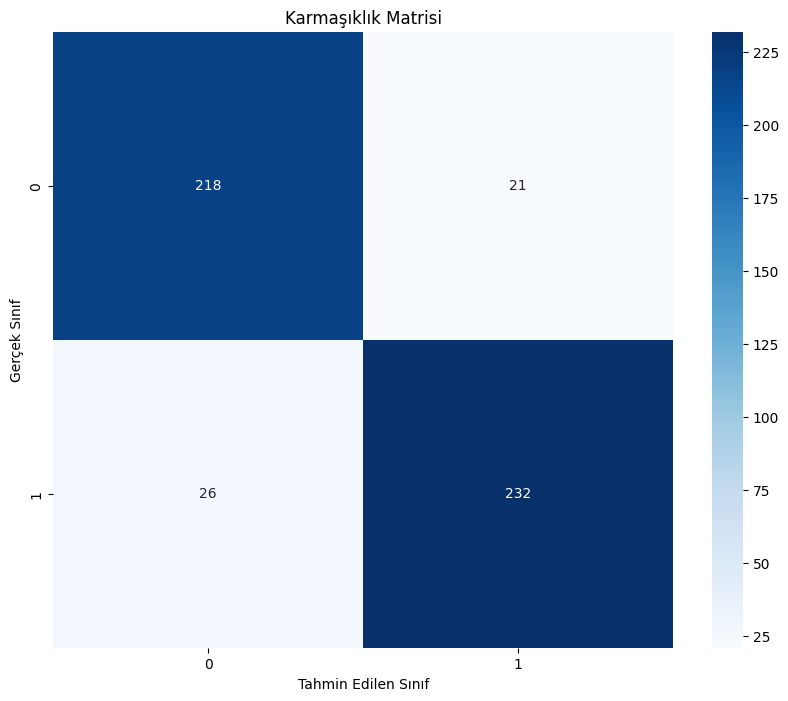

In [20]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

YSA

In [25]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [26]:
x_train.shape[0]

380928

In [27]:
y_train_ = to_categorical(y_train, num_classes=2)
y_test_ = to_categorical(y_test, num_classes=2)


In [28]:
y_train_.shape

(1984, 2)

In [29]:
x_train.shape

(380928, 28, 28, 1)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),


    tf.keras.layers.Dense(2,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 32)                4816928   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4818050 (18.38 MB)
Trainable params: 4818050 (18.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
x_train.shape

(380928, 28, 28, 1)

In [33]:
y_train_.shape

(1984, 2)

In [34]:
hist = model.fit(x_train, y_train_, validation_data=(x_test, y_test_), epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 380928
  y sizes: 1984
Make sure all arrays contain the same number of samples.

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

CNN

In [ ]:
## CNN Modeli Oluşturalım
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout

In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((224,224,3)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(8,3,activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(16,3,activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128,activation="relu"),
        Dropout(0.5),

        Dense(2,activation="softmax")
    ])


model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
hist = model.fit(x_train, y_train_, validation_data=(x_test, y_test_), epochs=10)
